In [9]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
mypath = '/content/drive/My Drive/fractal_test_images/solid/'

Mounted at /content/drive


#Import and Process Images

In [3]:
# Import and Process Images
filenames = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])
images = []

# Iterate through folder
for i in range(len(filenames)):
  image = cv2.imread(mypath+filenames[i], 0)
  # Add image to list
  images.append(image)
  print(f'{filenames[i]} - {np.shape(image)}') # Print filename and dimensions

s2_d1.0.png - (915, 915)
s2_d1.1.png - (915, 915)
s2_d1.2.png - (915, 915)
s2_d1.3.png - (915, 915)
s2_d1.5.png - (915, 915)
s2_d1.6.png - (915, 915)
s2_d1.8.png - (915, 915)
s2_d1.9.png - (915, 915)
s2_d2.0.png - (915, 915)


# Box Counting Function

In [68]:
def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])

    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    m, b = np.polyfit(np.log(sizes), np.log(counts), 1)
    #print(-m, b)
    #return -coeffs[0]
    return -m, b, sizes, counts

# Box Counting Results

In [84]:
plt.rcParams["figure.autolayout"] = False

In [91]:
#https://stackoverflow.com/questions/16992038/inline-labels-in-matplotlib

SyntaxError: ignored

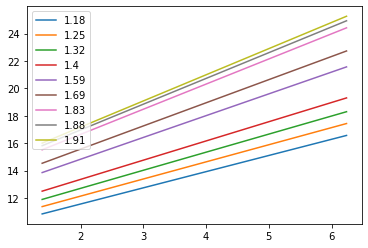

In [89]:
# Thresholded Images
for i in range(len(images)):
  slope, intercept, sz, count = fractal_dimension(np.asarray(images[i]))
  plt.plot(np.log(sz), slope*np.log(sz)+intercept, label=f"{round(slope, 2)}")

leg = plt.legend()
plt.show()



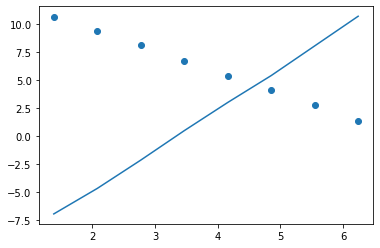

In [59]:
plt.scatter(np.log(sz), np.log(count))
plt.plot(np.log(sz), slope*np.log(count)+intercept)
plt.show()

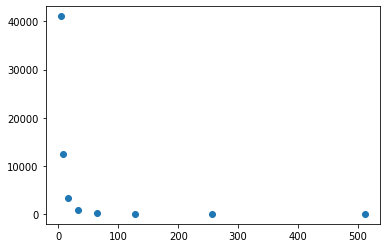

In [24]:
plt.scatter(sz, count)
plt.show()